---
# Business Objective

<center>
    <img src="https://thumbs.gfycat.com/PreciousConsciousBubblefish-size_restricted.gif" width="700" height="400" />
</center>

---


- This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy).

- The goal here is to model the probability that a business goes bankrupt from different features

---



---






In [1]:
# import the Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Data 
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Forecast Gold Price\Bankruptacy\bankruptcy-prevention.csv",delimiter=';')

In [3]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy




---



The data file contains 7 features about 250 companies**


---


* The data set includes the following variables:


---


1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7.	class: bankruptcy, non-bankruptcy (target variable).


---



---




#Data Overview

In [4]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

**Inferences**: 

---



The Data has no Null_values




In [5]:
# Descriptive statistics
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Inferences**:


---


No missing values are there 





In [6]:
# Information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


**Inferences**:

---


1) It does not contain a null-values.
                
 2) All columns type are right excluding the target  variable

 3) But our target variable in the object form.

#Data preprocessing

In [7]:
# Encoding on the target variable 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


**Inferences**:


---


 We perform the label encoding on the target variable and created bankruptcy=0, 
non-bankruptcy=1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 12.8 KB


Inferences: 

---


The Data-type of columns 

In [9]:
df.rename(columns={df.columns[-1]:'Class',df.columns[0]:'ind_risk',df.columns[1]:'manage_risk',df.columns[2]:'financial',df.columns[3]:'cred',df.columns[4]:'competitive',df.columns[5]:'operate_risk'},inplace=True)
print(df.columns)

Index(['ind_risk', 'manage_risk', 'financial', 'cred', 'competitive',
       'operate_risk', 'Class'],
      dtype='object')


**renaming for better understanding**

#Data visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

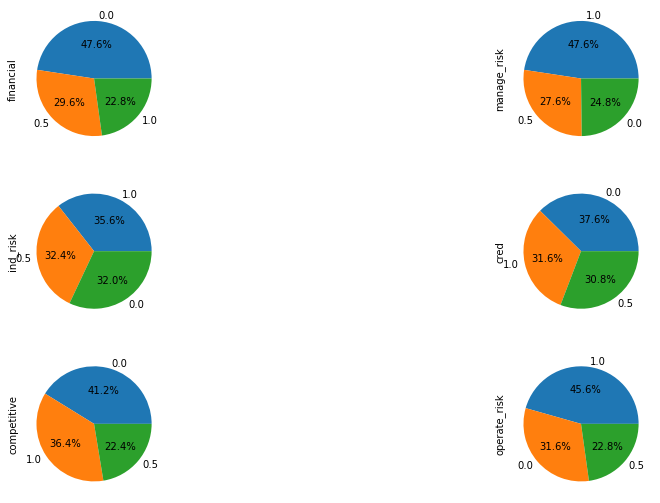

In [11]:
# fig.axs = plt.plot(3,2)
#plt.style.use('dark_background')
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2,wspace=0.8,hspace=0.5)
plt.figure(figsize=(16,9))
plt.subplot(3,2,1)
df['financial'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,2)
df['manage_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,3)
df['ind_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,4)
df['cred'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,5)
df['competitive'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,6)
df['operate_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,6)
plt.show()

<AxesSubplot:ylabel='Density'>

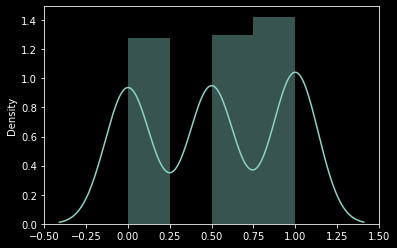

In [12]:
plt.style.use('dark_background')
sns.distplot([df['ind_risk']])

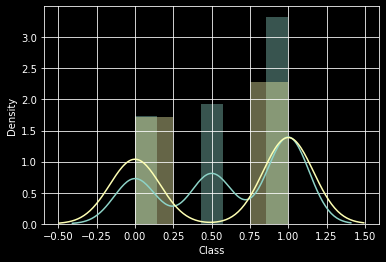

In [13]:

plt.style.use('dark_background')
sns.distplot(df['manage_risk'])
sns.distplot(df['Class'])
plt.grid('off') 

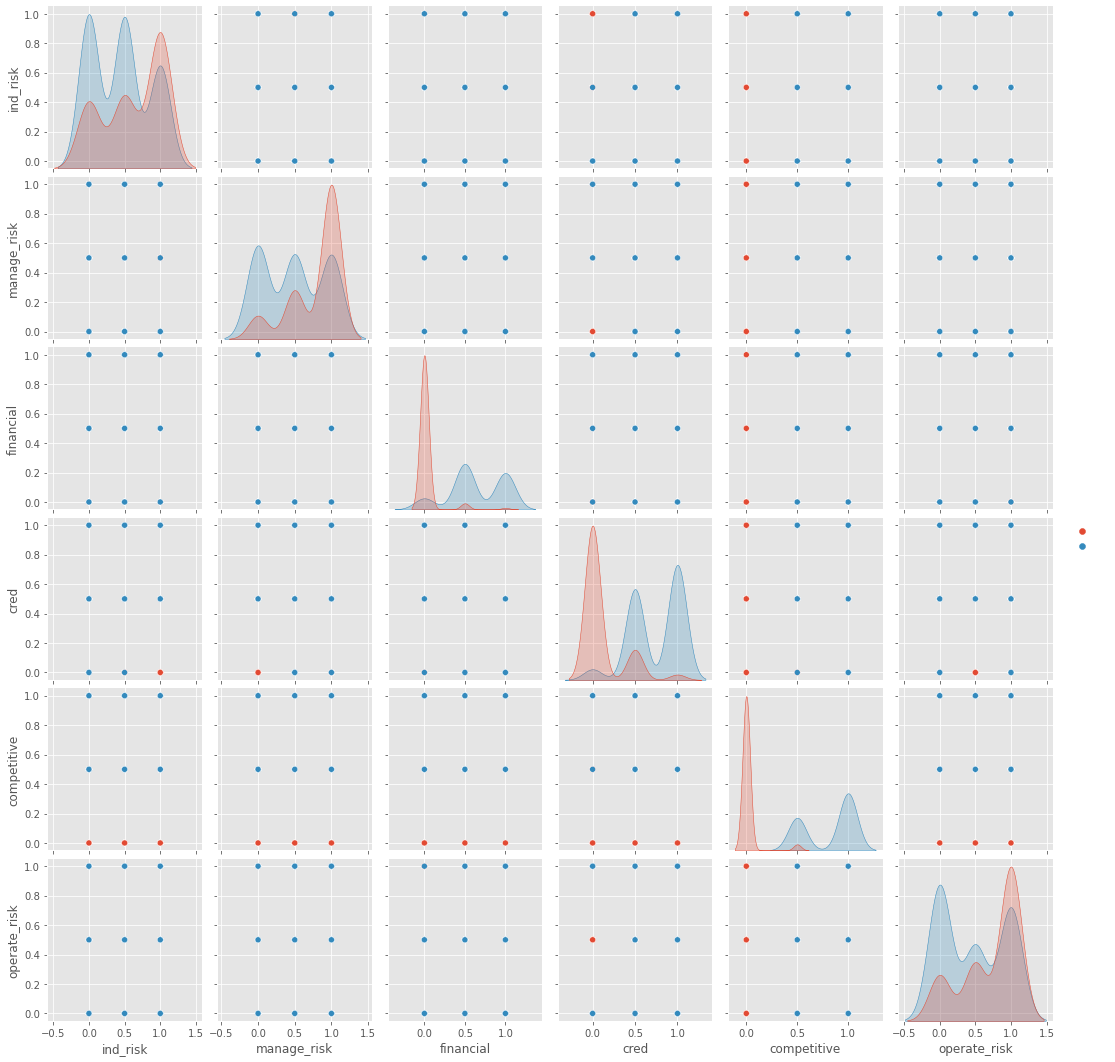

In [14]:
plt.style.use('ggplot')
sns.pairplot(df, hue= "Class")

In [15]:
df.corr()

,ind_risk,manage_risk,financial,cred,competitive,operate_risk,Class
ind_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
manage_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
cred,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitive,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operate_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
Class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<AxesSubplot:>

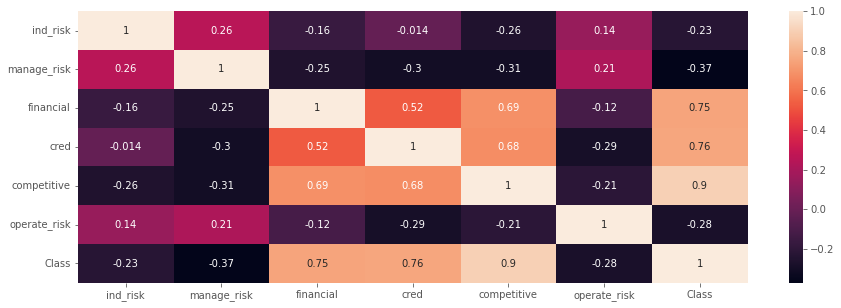

In [16]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

**inferences**


---


- the correlation of each and every variable with one another is seen

<AxesSubplot:>

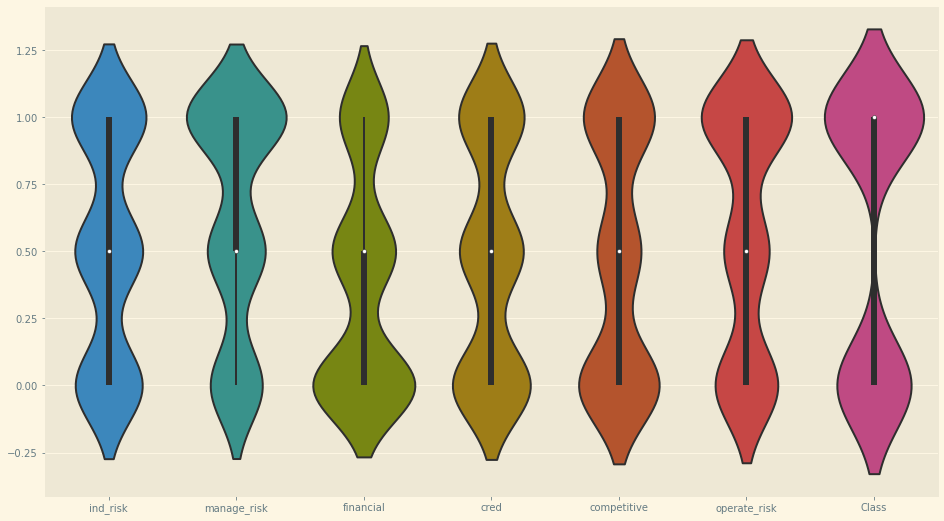

In [17]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(16,9))
sns.violinplot(data=df)

<h2>inferences</h2>


---


- by above plot we can state that there are no outliers in this dataset

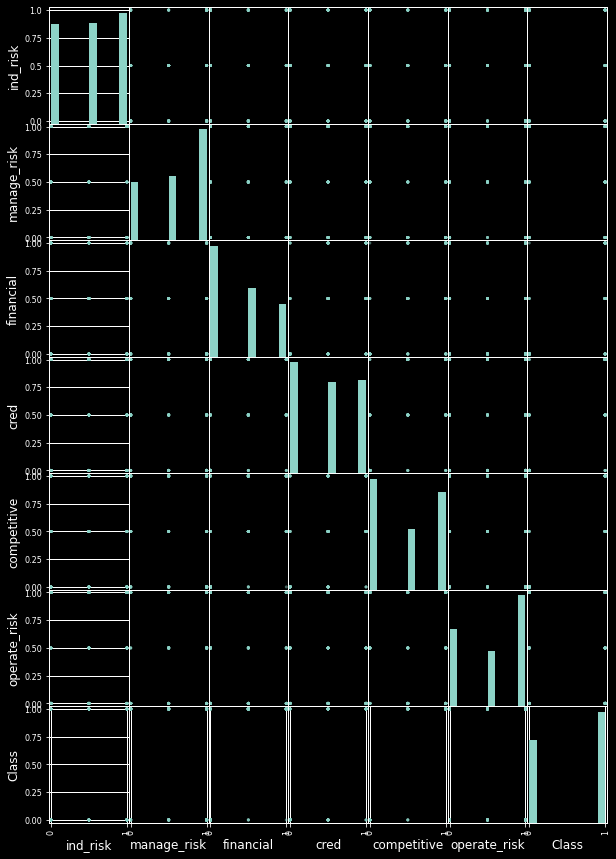

In [18]:

plt.style.use('dark_background')
pd.plotting.scatter_matrix(df,figsize=(10,15))
plt.show()

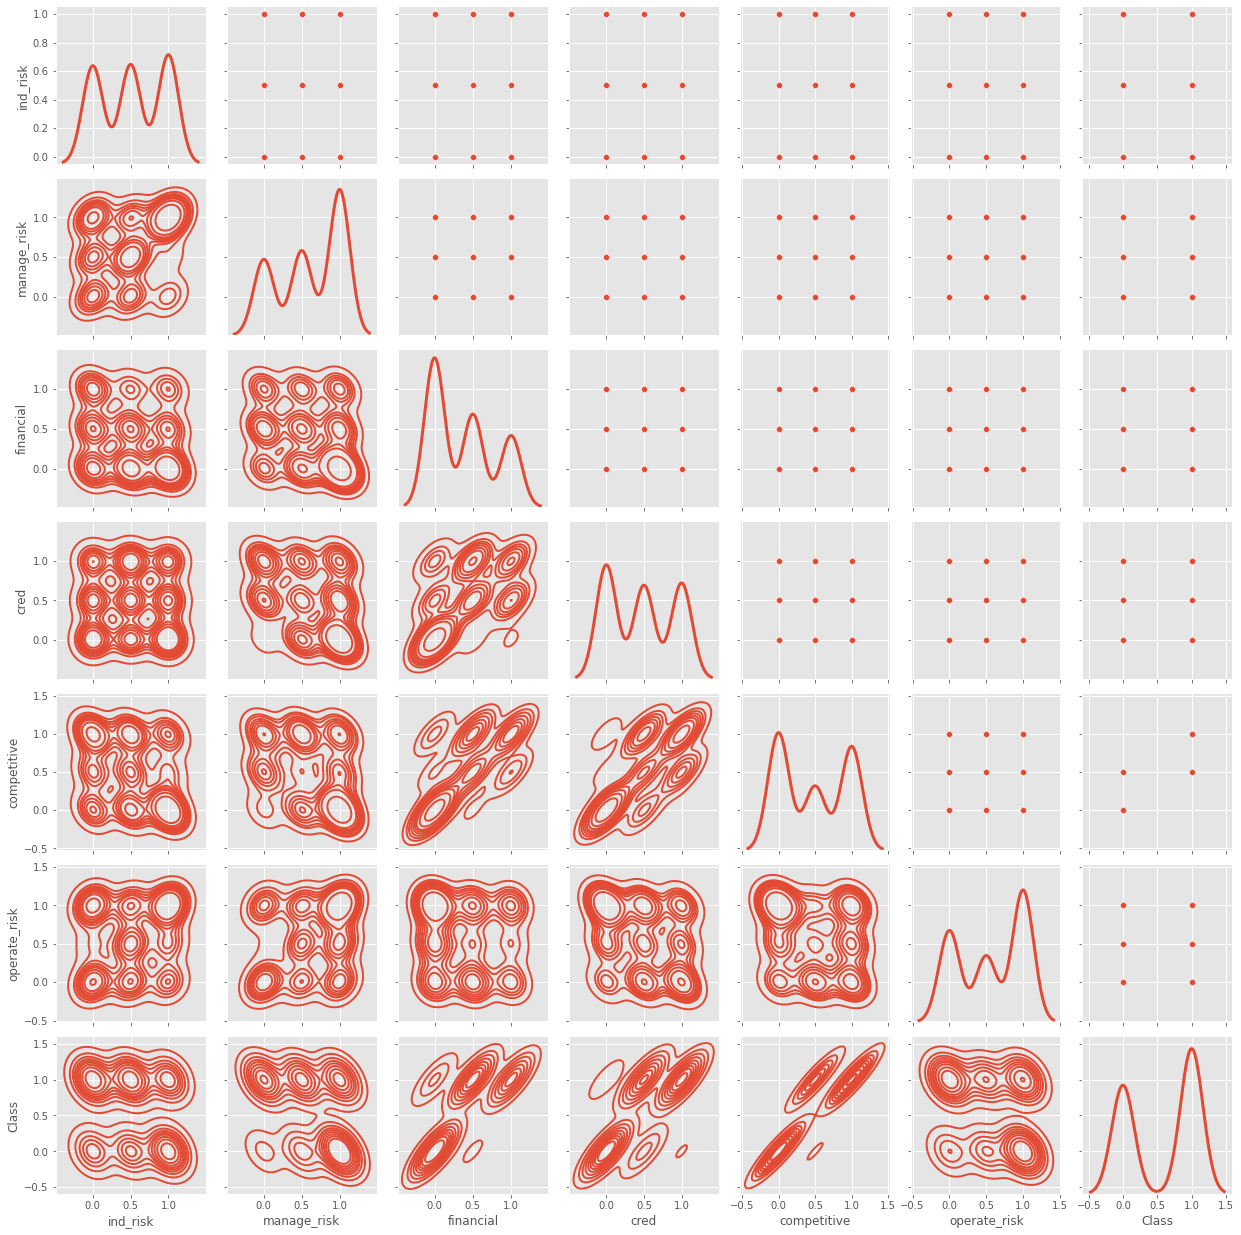

In [19]:
plt.style.use('ggplot')
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [20]:
y=df.iloc[:,-1]
x=df.iloc[:,:-1]

<AxesSubplot:xlabel='Class', ylabel='count'>

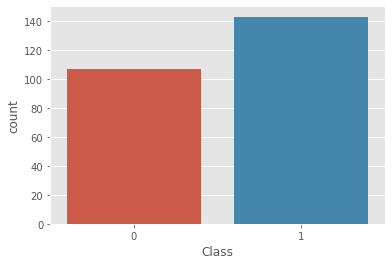

In [21]:
sns.countplot(x=y)

<h2>inferences</h2>


---


- we can find out the exact number of bankrupt and non bankrupt from the dataset

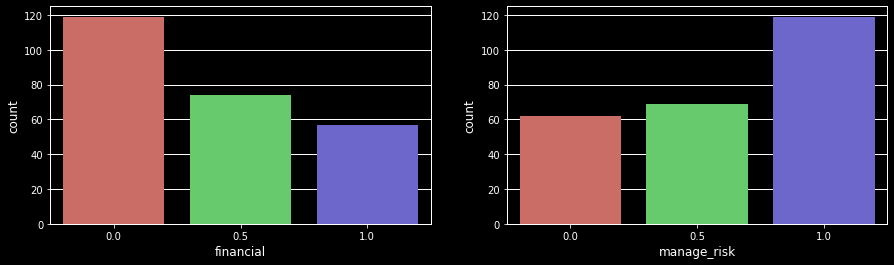

In [22]:
plt.style.use('dark_background')
plt.figure(figsize=(15,4))
plt.title('Comparison in financial and management')

# PCA with 2 pcs
plt.subplot(1,2,1)
sns.countplot(x = 'financial', data =df, palette = 'hls')
#plt.title('PCA 2 Component')

# tsne with 2 pcs
plt.subplot(1,2,2)
sns.countplot(x = 'manage_risk', data =df, palette = 'hls')
#plt.title('TSNE 2 Component')
plt.show()

<h2>inferences</h2>

---


- it is seen that financial flexibility is more important than management risk


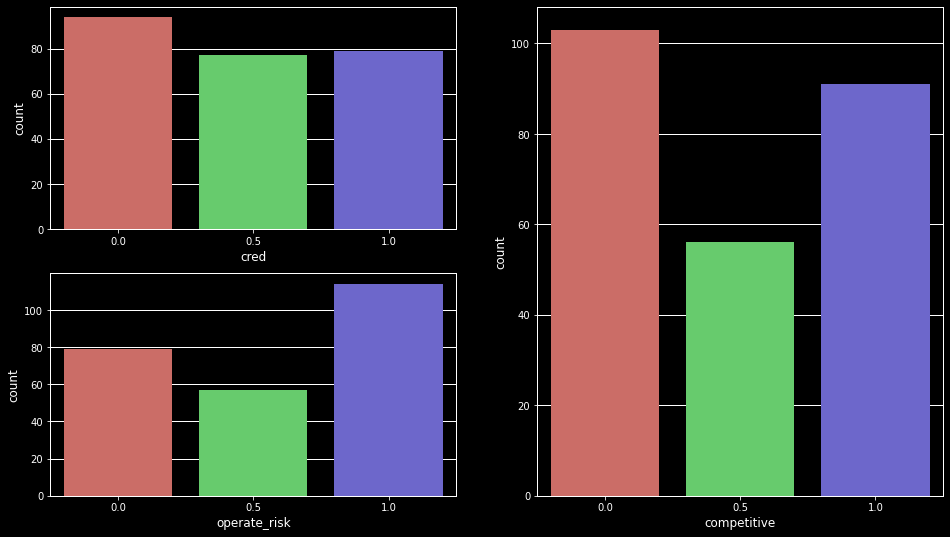

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(16,9))


plt.subplot(2,2,1)
sns.countplot(x = 'cred', data =df, palette = 'hls')



plt.subplot(1,2,2)
sns.countplot(x = 'competitive', data =df, palette = 'hls')


plt.subplot(2,2,3)
sns.countplot(x = 'operate_risk', data =df, palette = 'hls')
plt.show()

<h2>inferences</h2>


---


- we can find insights that credibility is finely distributed similarly

- as compared to all 3 plots we can find that competitiveness and credibility is more important that operating risk

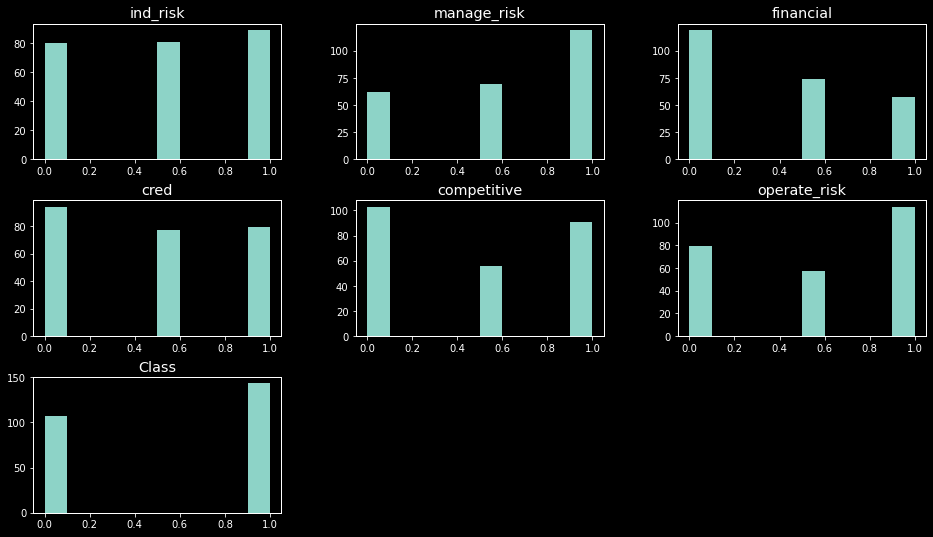

In [24]:
plt.style.use('dark_background')
df.hist(figsize=(16,9),grid=False)
plt.show()

<h2> Inferences
</h2>

---


- this is overall plot for distribution in all columns or variables of dataset

#Over sampling

In [28]:
#!pip install imbalanced-learn

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
ros=RandomOverSampler(random_state=0)

In [31]:
x,y=ros.fit_resample(x,y)

In [32]:
y.value_counts()

0    143
1    143
Name: Class, dtype: int64

<h2>Inferences</h2>

---


- the over sampling is used because the class variable is not evenly distributed within the balance of 0 and 1 viz bankrupt or not
- by using this over sampling technique the dataset is balanced equally

#smote

In [33]:
#smote
from imblearn.over_sampling import SMOTE

In [34]:
smote=SMOTE(random_state=0)

In [35]:
x,y=smote.fit_resample(x,y)

In [36]:
y.value_counts()

0    143
1    143
Name: Class, dtype: int64

<h2>Inferences</h2>

---



---


- SMOTE is used for Imbalanced Classification

- Referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short

#KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [39]:
knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
pred=knc.predict(x_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        22

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



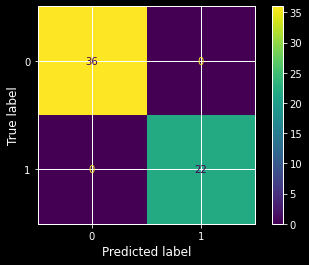

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knc,x_test,y_test)

#SVC

In [44]:
from sklearn.svm import SVC

In [45]:
clf = SVC(kernel='linear',C=10)
clf.fit(x_train , y_train)

SVC(C=10, kernel='linear')

In [46]:
y_pred = clf.predict(x_test)

In [47]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 100.0


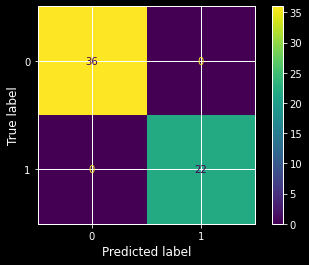

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x_test,y_test)

#Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB

In [50]:
GNB = GaussianNB()
MNB = MultinomialNB()

In [51]:
GNB = GNB.fit(x_train ,y_train)

y_pred = GNB.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[34  2]
 [ 0 22]]


In [53]:
from sklearn.metrics import accuracy_score

GNB= accuracy_score(y_test , y_pred)
GNB

0.9655172413793104

In [54]:
#Building the model with MultinomialNB
MNB = MNB.fit(x_train ,y_train)

y_pred = MNB.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [55]:
#Evaluating Model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[34  2]
 [ 0 22]]


In [56]:
#Accuracy of MNB
from sklearn.metrics import accuracy_score

MNB= accuracy_score(y_test , y_pred)
MNB

0.9655172413793104

#Decision Tree

In [57]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [58]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [59]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

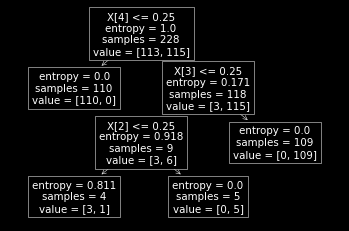

In [60]:
#PLot the decision tree
tree.plot_tree(model);


In [61]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    30
1    28
dtype: int64

In [62]:
preds

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [63]:
pd.crosstab(y_test,preds)

col_0,0,1
Class,,
0,30,0
1,0,28


In [64]:
# Accuracy 
np.mean(preds==y_test)

1.0

#Logistic


In [65]:
y=df.iloc[:,-1]
x=df.iloc[:,:-1]

In [66]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [67]:
y_pred = classifier.predict(x)

In [68]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})

In [69]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
245,1,1
246,1,1
247,1,1
248,1,1


In [70]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.99      1.00      1.00       143

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[106   1]
 [  0 143]]


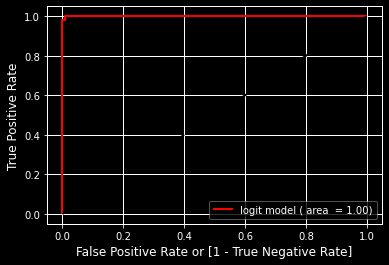

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Model Results

---


- KNN algorithm gives 100% accuracy

- SVM algorithm gives 100% accuracy

- NB algorithm gives 96% accuracy

- DT algorithm gives 100% accuracy

- LR algorithm gives 100% accuracy


#predictions

---



---


- as the dataset is an categorial classification problem we have used Logistic regression algorithm to predict

In [74]:
new_data=pd.DataFrame({'industrial_risk':0.5,"financial_flexibility":1.0,"operating_risk":1.0,"competitiveness":0.0,"credibility":0.5,"management_risk":0.0},index=[1])

In [75]:
y_pred=classifier.predict(new_data)

In [76]:
y_pred

array([1])

<h2>Predicted 1=Non bankrupt</h2>

In [77]:
new_data=pd.DataFrame({'industrial_risk':0.0,"financial_flexibility":1.0,"operating_risk":1.0,"competitiveness":0.0,"credibility":0.0,"management_risk":0.5},index=[1])

In [78]:
y_pred=classifier.predict(new_data)

In [79]:
y_pred

array([0])

:<h2>Predicted 0=Bankrupt</h2>




---



---

**<h1>♡ Thank you ♡</h1>**

---



---

